# Basic of opencv

OpenCV的全稱是Open Source Computer Vision Library，是一個跨平台的電腦視覺庫。  
[維基百科](https://zh.wikipedia.org/wiki/OpenCV)  
OpenCV現在有支援C++，Python  
在這裡利用jupyter與python實現，順便做做筆記


OpenCV python的Tutorials   
[Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/)

## 讀取影像

openCV的基本影像容器  
在C++中使用Mat，python直接imread進來就好  
imread可以帶attributed，來決定讀進來的影像通道數量  
* cv2.IMREAD_COLOR : 預設，三通道
* cv2.IMREAD_GRAYSCALE : 灰階，單通道
* cv2.IMREAD_UNCHANGED : 將所有通道讀取，包括透明度等等

In [1]:
import cv2 as cv
import os

root = os.getcwd()
img_path = os.path.join(root,'Image/lena.jpg')

img = cv.imread(img_path)

type(img)

numpy.ndarray

## 顯示影像

一般在IDE內都是使用imshow來顯示圖案  
配合waitKey來給予指令操作，與destroyAllWindows()來回收資源  
但為了在jupyter能夠方便檢視結果  
這裡使用matplotlib的imshow來顯示結果

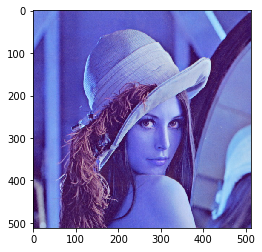

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

'''
# normal way to show image

cv.namedWindow('window1', cv2.WINDOW_NORMAL)
cv.imshow('window1',img)
cv.waitKey(0)
cv.destroyAllWindows()
'''

plt.imshow(img)

## 通道轉換

可以看到納美人lena，會這樣是因為顏色通道的因素  
在openCV，影像顏色通道是BGR，而matplotlib是RGB  
為了能夠正常顯示顏色  
需要做通道轉換

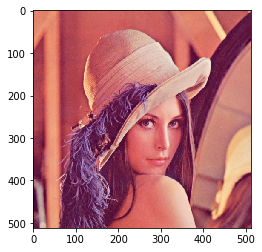

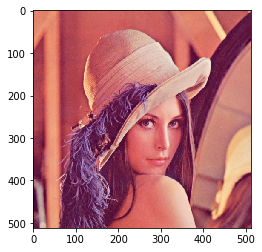

In [3]:
img_transfer = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_transfer)

# a simple way
plt.figure()
img_transfer2 = img[:,:,::-1]
plt.imshow(img_transfer2)

方便起見，之後都利用一個函示來畫圖就好

In [4]:
def plotimg(img,size=None,transfer=True,colormap=None):
    plt.figure(figsize=size)
    plt.xticks([])
    plt.yticks([])
    if transfer == True:
        plt.imshow(img[:,:,::-1],cmap=colormap)
    else:
        plt.imshow(img,cmap=colormap)

## 影像資訊

影像有許多的資訊，如：長、寬、通道數...

In [5]:
print('img rows: ',img.shape[0])
print('img rows: ',img.shape[1])
print('img rows: ',img.shape[2])

img rows:  512
img rows:  512
img rows:  3


## 影像複製

由於python的特性  
複製一樣有soft copy跟hard copy的差別

In [6]:
print('origin img address: ', hex(id(img)))

img_same = img
if img_same is img:
    print('soft copy, use "=", and img address: ',hex(id(img_same)))

img_clone = img.copy()
if img_clone is not img:
    print('hard copy, use copy(), and img address: ',hex(id(img_clone)))

origin img address:  0x1f686c0a620
soft copy, use "=", and img address:  0x1f686c0a620
hard copy, use copy(), and img address:  0x1f688fb7440


In [17]:
img_same.dtype

dtype('uint8')